In [110]:
import PyPDF2
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from mpl_toolkits.mplot3d import Axes3D
import requests 

In [131]:
PDFfilename = "estreallas.pdf"
fileData = (PDFfilename, open(PDFfilename, 'rb')) #"rb" stands for "read bytes"

files = {'f': fileData} 

apiKey = "uiv2c4isbi5o" 

fileExt = "csv" #format/file extension of final document

postUrl = "https://pdftables.com/api?key={0}&format={1}".format(apiKey, fileExt)
#the .format puts value of apiKey where {0} is, etc

response = requests.post(postUrl, files=files)

response.raise_for_status() # ensure we notice bad responses

downloadDir = "stars.csv" #directory where you want your file downloaded to 

with open(downloadDir, "wb") as f:
    f.write(response.content) #write data to csv
print(downloadDir)

stars.csv


In [135]:
file_name = 'stars2.csv'
data = pd.read_csv(file_name)
data

,"BRIGHT STARS,",Ascension,Declination
0,9072,00 00 15.8,C06 57 57
1,9076,00 00 51.9,65 28 27
2,9084,00 02 31.3,76 57 49
3,9089,00 02 54.5,05 54 41
4,9098,00 04 41.2,17 13 59
5,3,00 06 17.0,05 36 15
6,15,00 09 20.9,C29 11 33
7,21,00 10 10.6,C59 15 06
8,25,00 10 20.7,45 38 44
9,27,00 11 17.4,C46 10 31


In [136]:
brillos = data.iloc[:,0].values
asc = data.iloc[:,1].values
desc = data.iloc[:,2].values


In [137]:
RA_h = []
RA_m = []
RA_s = []
for d in asc:
    RA_h.append(float(str(d).split(' ')[0])*15)
    RA_m.append(float(str(d).split(' ')[1])*.25)
    RA_s.append(float(str(d).split(' ')[2])*0.004166)
RA_h = np.array(RA_h)
RA_m = np.array(RA_m)
RA_s = np.array(RA_s)
A = RA_h + RA_m + RA_s
A

array([6.58228000e-02, 2.16215400e-01, 6.30395800e-01, ...,
       3.59676222e+02, 3.59904975e+02, 3.59970381e+02])

In [138]:
D_h = []
D_m = []
D_s = []
for r in desc:
    h = str(r).split(' ')[0]
    m = h.split('C')
    if(len(m) == 2):
        insertion = float(m[1])
    else:
        insertion = -1*float(m[0])
    D_h.append(insertion) 
    D_m.append(float(str(r).split(' ')[1])) 
    D_s.append(float(str(r).split(' ')[2])) 
D_h = np.array(D_h)
D_m = np.array(D_m)
D_s = np.array(D_s)
B = (abs(D_h) + (D_m/60) + D_s/3600)*np.sign(D_h)
B

array([  6.96583333, -65.47416667, -76.96361111, ...,  25.24416667,
        -3.45333333, -52.6425    ])

In [183]:
C = np.linspace(100, 3010, len(B))
C

array([ 100.        ,  101.98228883,  103.96457766, ..., 3006.03542234,
       3008.01771117, 3010.        ])

In [184]:
x = (C*np.cos(B))*np.cos(A)
x

array([ 7.74224682e+01, -8.74484483e+01,  4.54248121e-01, ...,
        1.07932063e+02,  5.48063635e+02,  5.54290106e+02])

In [185]:
y = (C*np.cos(B))*np.sin(A)
y

array([ 5.10353637e+00, -1.92079565e+01,  3.31474445e-01, ...,
        2.98544343e+03, -2.81008781e+03, -2.10033733e+03])

In [186]:
z = C*np.sin(B)
z

array([   63.08498499,   -48.82837833,  -103.96305686, ...,
         334.25614357,   922.60680295, -2083.61359024])

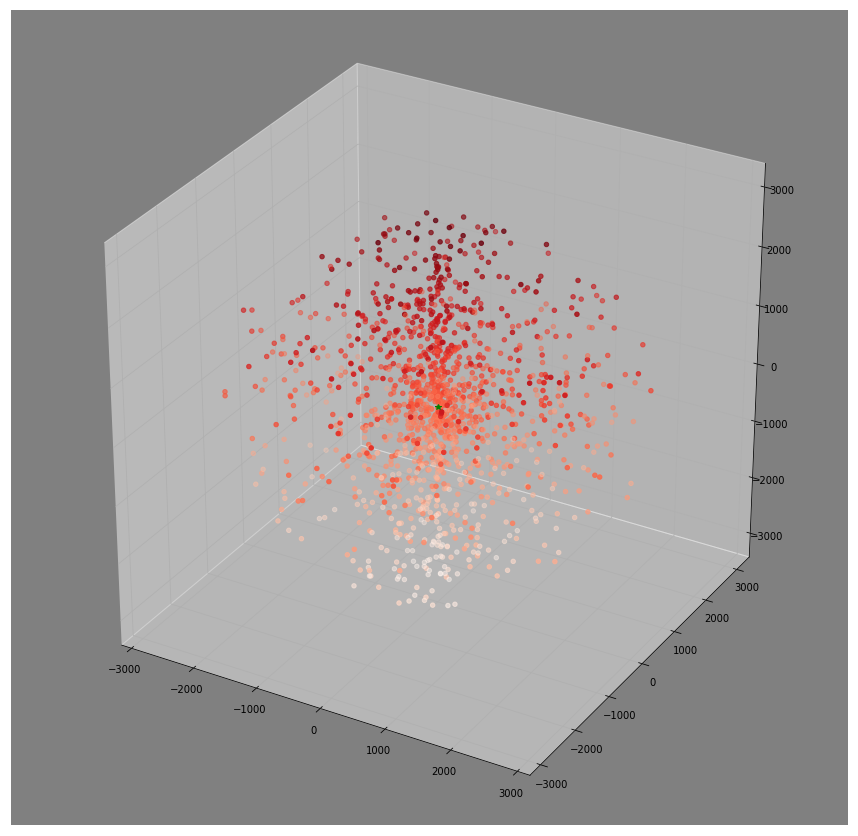

3


In [205]:
fig = plt.figure(figsize=(15,15))
#ax = fig.gca(projection='3d')
ax = plt.axes(projection='3d')
ax.set_facecolor("gray")
ax.plot([0], [0], [0], label="Sol", color='green', marker='*',)
ax.scatter3D(x, y, z, c=z, cmap='Reds')
plt.show()
print(3)

In [98]:
fileName = "estrellas.csv"
data = pd.read_csv(fileName)
data

,Stellar,Mass,Luminosity,Radius,Temp,Color Index,Abs Mag,Bolo Corr,Bolo Mag,Star Color
0,DA0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
1,DB0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
2,DC0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
3,DO0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
4,DQ0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
5,DZ0,1.1,6.910000e+00,0.00902,100000,-0.37,10.2,-7.55,2.65,155 178 255
6,DA1,0.9,2.650000e-01,0.00696,50400,-0.35,10.8,-4.61,6.19,159 181 255
7,DB1,0.9,2.650000e-01,0.00696,50400,-0.35,10.8,-4.61,6.19,159 181 255
8,DC1,0.9,2.650000e-01,0.00696,50400,-0.35,10.8,-4.61,6.19,159 181 255
9,DO1,0.9,2.650000e-01,0.00696,50400,-0.35,10.8,-4.61,6.19,159 181 255


In [100]:
x = np.array(data.iloc[:,4].values)
y = np.array(data.iloc[:,3].values)
z = np.array(data.iloc[:,2].values)

In [130]:
def obj_ridge(b, x, y, n, l):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)+l*np.linalg.norm(b)**2

b0 = np.random.random((8,))
res = opt.minimize(obj_ridge, b0, args=(x*y, z, 7, 0.0001))
yhat7_ridge = np.array([(x*y)**j for j in range(8)]).T.dot(res.x)

def obj_lasso(b, x, y, n, l):
    return np.sum((y-b.dot([x**i for i in range(n+1)]))**2)+l*np.linalg.norm(b,1)

b0 = np.random.random((8,))
res = opt.minimize(obj_lasso, b0, args=(x*y, z, 7, 0.0001))
yhat7_lasso = np.array([(x*y)**j for j in range(8)]).T.dot(res.x)



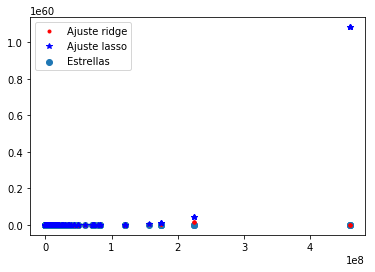

In [134]:
fig = plt.figure()
plt.scatter(x*y, z, label='Estrellas')
plt.plot(x*y, yhat7_ridge, "r.", label="Ajuste ridge")
plt.plot(x*y, yhat7_lasso, "b*", label="Ajuste lasso")
plt.legend(loc="best")
plt.show()